# **Introduction to Clustering**

## Clustering

- Clustering is an unsupervised learning technique used to group similar data points together based on their features.
- It is widely used in various fields such as data analysis, pattern recognition, image processing, and more.
- The goal of clustering is to partition a dataset into groups or clusters, where data points within the same cluster are more similar to each other than to those in other clusters.

For example The data points in the graph below clustered together can be classified into one single group. We can distinguish the clusters, and we can identify that there are 3 clusters in the below picture.

![merge3cluster](https://media.geeksforgeeks.org/wp-content/uploads/merge3cluster.jpg)
Source: Geeksforgeeks

**It is not necessary for clusters to be spherical as depicted below**

![merge3cluster](https://media.geeksforgeeks.org/wp-content/uploads/clusteringg.jpg)
Source: Geeksforgeeks

## K-means Clustering

- K-means clustering is a popular partitioning algorithm that aims to divide a dataset into K clusters, where K is predefined.
- The algorithm works iteratively to assign each data point to the nearest centroid and then update the centroids based on the mean of the data points assigned to each cluster.

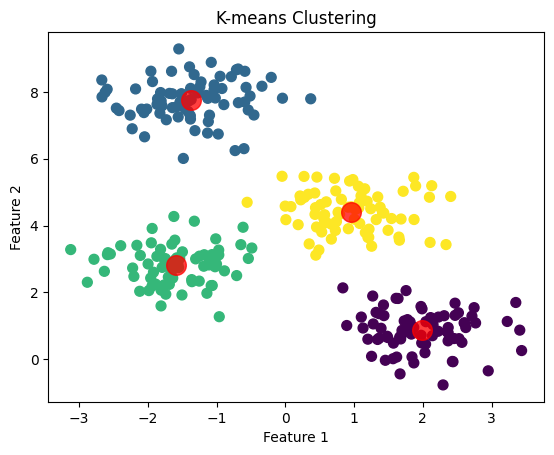

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## DBSCAN
### (Density-Based Spatial Clustering of Applications with Noise)

- DBSCAN is a density-based clustering algorithm that groups together closely packed points based on a threshold for density.
- It identifies clusters as areas of high density separated by areas of low density.

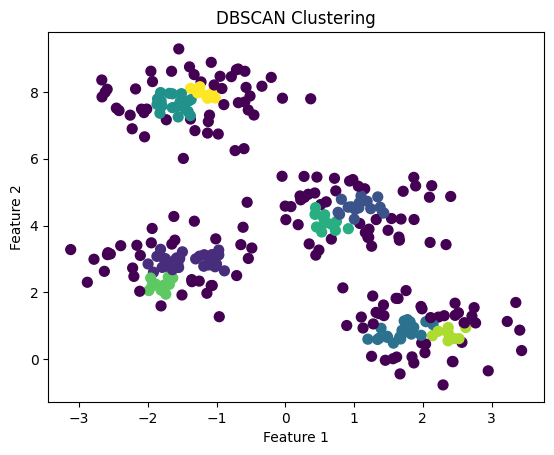

In [5]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
y_dbscan = dbscan.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

 ## HDBSCAN
 ### (Hierarchical Density-Based Spatial Clustering of Applications with Noise)

- HDBSCAN is an extension of DBSCAN that incorporates a hierarchical approach to clustering, allowing for robust clustering of datasets with varying densities.
- It builds a hierarchy of clusters and selects the most stable clusters as the final output, effectively handling clusters of different shapes and sizes.
- HDBSCAN automatically determines the number of clusters and identifies outliers as noise points.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 2.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-py2.py3-none-any.whl.metadata (3.1 kB)
Using cached Cython-0.29.37-py2.py3-none-any.whl (989 kB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp311-cp311-macosx_13_0_x86_64.whl size=711346 sha256=a37b36dbf69697dabe852d5a2e750e636b5188bcae4d129f395b3b730500913f
  Stored in directory: /Users/hirakdesai/Library/Caches/pip/wheels/4e/8c/6f/d0495e4e40cbd27a8c7330d4e963837e099d6e16014dbdcdb5
Successfully built hdbscan

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


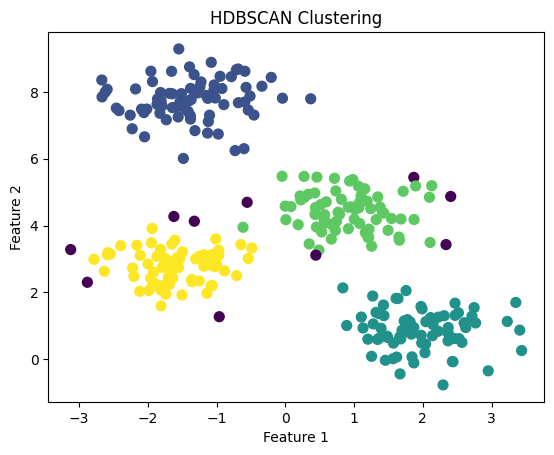

In [9]:
import hdbscan

# Apply HDBSCAN clustering
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)
y_hdbscan = hdbscan_clusterer.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_hdbscan, s=50, cmap='viridis')
plt.title('HDBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## BIRCH
### (Balanced Iterative Reducing and Clustering using Hierarchies)

- BIRCH is a hierarchical clustering algorithm that is designed to handle large datasets efficiently.
- It builds a tree-based data structure to represent the data distribution and performs clustering by recursively partitioning the data into smaller clusters.
- BIRCH is suitable for datasets with a large number of samples where memory usage and computational efficiency are important considerations.

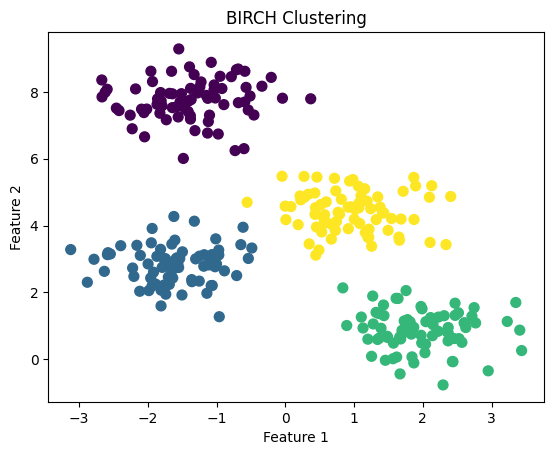

In [6]:
from sklearn.cluster import Birch

# Apply BIRCH clustering
birch = Birch(n_clusters=4)
y_birch = birch.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_birch, s=50, cmap='viridis')
plt.title('BIRCH Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


##  Affinity Propagation

- Affinity Propagation is a clustering algorithm based on the concept of message passing between data points.
- It does not require the number of clusters to be predefined, as it automatically discovers the optimal number of clusters based on the data similarities.
- Affinity Propagation is particularly useful for datasets with complex structures and irregular shapes.

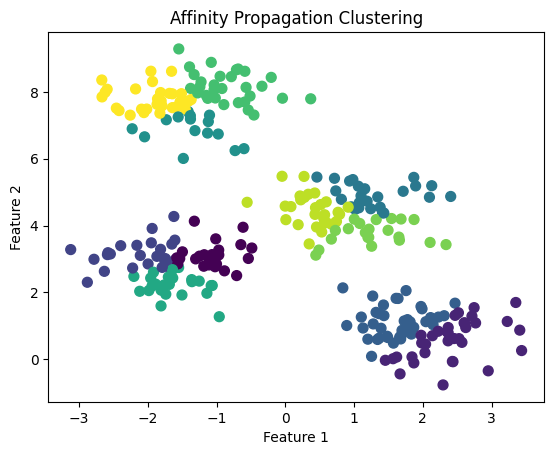

In [7]:
from sklearn.cluster import AffinityPropagation

# Apply Affinity Propagation clustering
affinity_propagation = AffinityPropagation()
y_affinity_propagation = affinity_propagation.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_affinity_propagation, s=50, cmap='viridis')
plt.title('Affinity Propagation Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Semi-Supervised Learning in Clustering

- Semi-supervised learning in clustering refers to the incorporation of labeled data into the clustering process to improve cluster quality or guide the clustering process.
- It combines both labeled and unlabeled data to perform clustering, leveraging the available information to achieve better clustering results.
- Semi-supervised clustering algorithms can be beneficial when only a small portion of the data is labeled or when domain knowledge is available to guide the clustering process.

In [1]:
from sklearn.datasets import make_classification

# Generate synthetic labeled data
X_labeled, y_labeled = make_classification(n_samples=100, n_features=2, n_classes=3, n_clusters_per_class=1, random_state=42)

# Semi-Supervised Learning Example
from sklearn.semi_supervised import LabelSpreading
import matplotlib.pyplot as plt

# Create a semi-supervised clustering model
label_spreading = LabelSpreading(kernel='knn', alpha=0.8)
label_spreading.fit(X_labeled, y_labeled)
y_semi_supervised = label_spreading.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_semi_supervised, s=50, cmap='viridis')
plt.title('Semi-Supervised Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


ModuleNotFoundError: No module named 'sklearn'